In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score


#from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv')
X=df.iloc[:,:-1]


In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #Number of components needed to have 95% of explained variance
pca.fit(X)

PCA(n_components=0.95)

In [12]:
X_hat=pca.transform(X)
X_hat=pd.DataFrame(X_hat)

In [14]:
clusters=2 #We aim to split activities into two groups: "Active" activities like  Walking, Walking upstairds/downstairs
#and "Inactive" activities like sitting, laying and standing

In [37]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=clusters)

In [38]:
df['kmeans']=km.fit_predict(X_hat)

In [39]:
Kresult=df[['Activity','kmeans']].groupby(['kmeans','Activity']).size().to_frame().rename(columns={0:'number'})

In [40]:
Kresult #How the activities where clusted by the Kmeans algorithm

number
kmeans Activity                  
0      LAYING                1932
       SITTING               1774
       STANDING              1906
1      LAYING                  12
       SITTING                  3
       WALKING               1722
       WALKING_DOWNSTAIRS    1406
       WALKING_UPSTAIRS      1544

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
ag=AgglomerativeClustering(n_clusters=clusters, metric='euclidean',linkage='ward')

In [22]:
df['AggClust']=ag.fit_predict(X_hat)

In [24]:
(df[['Activity','AggClust','kmeans']]
 .groupby(['AggClust','Activity'])
 .size()
 .to_frame()
 .rename(columns={0:'number'})) #How Agglomerative clustering clustered the activities

number
AggClust Activity                  
0        LAYING                1944
         SITTING               1777
         STANDING              1906
1        WALKING               1722
         WALKING_DOWNSTAIRS    1406
         WALKING_UPSTAIRS      1544

In [33]:
def display_cluster(X,km=[],num_clusters=0,shift=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    for i in range(num_clusters):
        plt.scatter(X.loc[km.labels_==i,0+shift],X.loc[km.labels_==i,1+shift],c = color[i],alpha = alpha,s=s)
        plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

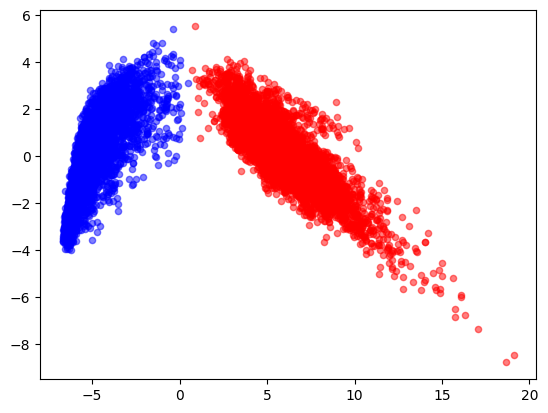

In [41]:
display_cluster(X_hat,km,2,0) #Scatter plot of the first two components of PCA, clearly showing the split beween "Active"
#and "inactive" activities